# COMP 4151 Project

## Group 1
**Members:**
- Talha Chaudhry
- Xin Ju
- James Willson

## Overview

The goal of this project is to apply analytics techniques learned in this course to study a real-world dataset, and if possible, build a model to make prediction.

The main dataset provided is BCHI-dataset_2019-03-04.csv. More information about the data set can be found here: https://www.bigcitieshealth.org/city-data




## I. Basic Understanding of the Dataset

In this phase, make sure you understand as much as possible the data set.

Here are some questions that you should answer. When you answer a question, your answer should be in English. At the same time, if applicable, the answer should consist Python code that shows how you obtain your answer.  People should be able to read and understand your answer without guessing on your behalf how to get the answer.

1. What is the Indicator attribute?
2. How many categories of Indicator are there?
3. Explain the "Value" value of row 26382 in this dataset.
4. Explain the "Value" value of row 7833.
5. Explain the "Value" value of row 10682.  What does it mean that the "Sex" value is "Both"?
6. Explain the "Value" value of row 26701.
7. Specifically, which factors does the indicator category 'Social and Economic Factors' consist of?


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bchi = pd.read_csv('https://umdrive.memphis.edu/vphan/public/4151/BCHI-dataset_2019-03-04.csv')

**1. What is the Indicator attribute?**

**Indicator** attribute is essentially the defining factors of the of the broad Indicator Categories, which include health, socio-economic, and demographic among others, of a parrticula city for some particular time period and subsection of the city population.

**2. How many categories of Indicator are there?**

In [3]:
print('Total number of Indicator categories are:', len(bchi['Indicator Category'].unique()))
print('Total number of Factors for the Indicator categories are:', len(bchi['Indicator'].unique()))

Total number of Indicator categories are: 13
Total number of Factors for the Indicator categories are: 61


**3. Explain the "Value" value of row 26382 in this dataset.**

In [4]:
bchi.loc[26382]

Indicator Category                                 Maternal and Child Health
Indicator                      Infant Mortality Rate (Per 1,000 live births)
Year                                                                    2010
Sex                                                                     Both
Race/Ethnicity                                                      Asian/PI
Value                                                                      2
Place                                                             Denver, CO
BCHC Requested Methodology              Infant deaths per 1,000 live births.
Source                                                         Vital Records
Methods                                                                  NaN
Notes                                                                    NaN
90% Confidence Level - Low                                               NaN
90% Confidence Level - High                                              NaN

The **Value** attribute in this row indicates that the Infant Mortality rate for the year 2010 in Denver, Colorado, was 2 deaths per 1,000 liver births amongst those of Asian/Pacific Islander ethnicity.

**4. Explain the "Value" value of row 7833.**

In [5]:
bchi.loc[7833]

Indicator Category                                               Chronic Disease
Indicator                      Percent of Adults Who Meet CDC-Recommended Phy...
Year                                                                        2011
Sex                                                                         Both
Race/Ethnicity                                                          Hispanic
Value                                                                       44.2
Place                                               Oakland (Alameda County), CA
BCHC Requested Methodology     BRFSS (or similar survey). Percent of populati...
Source                                                          CHIS- 2005, 2009
Methods                        Adults 18+ years, Moderate physical activity a...
Notes                                                                        NaN
90% Confidence Level - Low                                                   NaN
90% Confidence Level - High 

This **Value** is a percentage of the adult population (18+ years) of Hispanic ethnicity in Oakland (Alameda County), California, that met the CDC's recommended physical activity levels in 2011. The value is 44.2%.

**5. Explain the "Value" value of row 10682.  What does it mean that the "Sex" value is "Both"?**

In [6]:
bchi.loc[10682]

Indicator Category                                                  Demographics
Indicator                                Percent of Population with a Disability
Year                                                                        2016
Sex                                                                         Both
Race/Ethnicity                                                          Hispanic
Value                                                                        8.9
Place                                                            Los Angeles, CA
BCHC Requested Methodology     Percentage of the population with a disability...
Source                         US Census Bureau, American Community Survey 1-...
Methods                                                                      NaN
Notes                                                                        NaN
90% Confidence Level - Low                                                   NaN
90% Confidence Level - High 

This **Value** is also a percentage. Its the proportion of the Hispanic population in Los Angeles, California, that had a disablity in 2016 according to the US Census Bureau. The value is 8.9%. The **Sex** attribute in this case is both, indicating that both males and females are included as a whole while calculating this value.

**6. Explain the "Value" value of row 26701.**

In [7]:
bchi.loc[26701]

Indicator Category                                     Maternal and Child Health
Indicator                          Infant Mortality Rate (Per 1,000 live births)
Year                                                                        2012
Sex                                                                         Both
Race/Ethnicity                                                             White
Value                                                                          5
Place                                                            San Antonio, TX
BCHC Requested Methodology                  Infant deaths per 1,000 live births.
Source                         Bexar County resident, SA Metro Health Birth a...
Methods                                                                      NaN
Notes                                                     Bexar County Residents
90% Confidence Level - Low                                                   NaN
90% Confidence Level - High 

The Value attribute in this row indicates that the Infant Mortality rate for the year 2012 in San Antonio, Texas, is 5 deaths per 1,000 liver births amongst those of Caucasian ethnicity. The **Notes** indicate that this encompasses the entire Bexar County, not just San Antonio.

**7. Specifically, which factors does the indicator category 'Social and Economic Factors' consist of?**

In [8]:
A = set(bchi.loc[bchi['Indicator Category'] == 'Social and Economic Factors'].Indicator.unique())

print('The Social and Economic Factors are:', A)

The Social and Economic Factors are: {'Percent of High School Graduates (Over Age 18)', 'Median Household Income (Dollars)', 'Percent of Population Uninsured', 'Percent of Children Living in Poverty', 'Percent of Households Whose Housing Costs Exceed 35% of Income', 'Percent of 3 and 4 Year Olds Currently Enrolled in Preschool', 'Percent Unemployed', 'Percent Living Below 200% Poverty Level'}


## II. Data Exploration

Study obesity in both adults and high school students in this data set.

Such a study may involve a number steps:

* Quick exploration of the data on the subject of obesity.
    + This requires that you ask basic questions. Many of these questions can be answered using pandas.
    + This may also require that you draw figures to get a better understanding of the data.  seaborn should be helpful here.

* Establishing a number of hypotheses about obesity (cause, effect, etc.)

* Analyze, report on your hypotheses.

An important goal of the project is for you to communicate effectively. Clarity in writing (English and Python) is extremely important. Readers do not want to guess how you arrive to your findings.




In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('https://umdrive.memphis.edu/vphan/public/4151/BCHI-dataset_2019-03-04.csv')

In [11]:
indicators = df.groupby('Indicator')
child_obesity = indicators.get_group('Percent of High School Students Who Are Obese')
adult_obesity = indicators.get_group('Percent of Adults Who Are Obese')
obesity = child_obesity.append(adult_obesity)

First, let's do some data exploration, looking at obesity trends in both Adults and High School kids across years, place, sex and area. This will be done through visualisations and graphs, and based on these this report shall make observations and construct hypothesis to test.

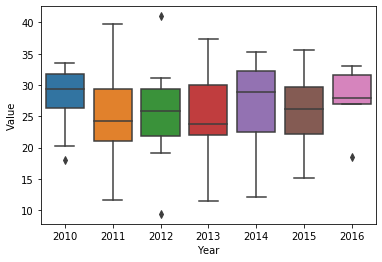

In [12]:
# Distribution of Adult Obesity in All Cities From 2010 - 2016
cond = (adult_obesity['Race/Ethnicity'] == 'All') & (adult_obesity['Sex'] == 'Both')
adult_obesity_through_the_yrs = adult_obesity.loc[cond]

sns.boxplot(x='Year', y='Value', data= adult_obesity_through_the_yrs)

Obesity levels among Adults have not gone drastics changes across the years 2010-2016.

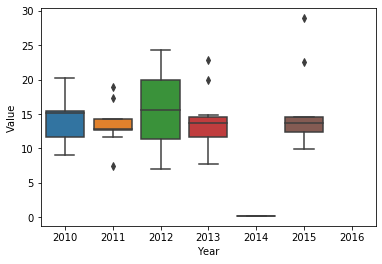

In [14]:
#Distribution of Child Obesity in All Cities From 2010 - 2016
cond = (child_obesity['Race/Ethnicity'] == 'All') & (child_obesity['Sex'] == 'Both')
child_obesity_through_the_yrs = child_obesity.loc[cond]

sns.boxplot(x='Year', y='Value', data= child_obesity_through_the_yrs)

Obesity amongst kids has also not experienced any significant changes, although there is paucity of data which means confidence for thois observation is low.

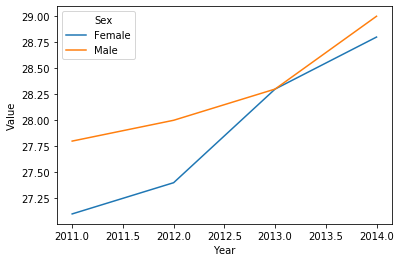

In [15]:
#Adult Obesity Through the Years (All Races, M/F Comparison) Using U.S. Total
cond = (adult_obesity['Place'] == 'U.S. Total, U.S. Total') & ((adult_obesity['Sex'] == 'Male') | (adult_obesity['Sex'] == 'Female')) 
adult_obesity_US_total_M_F = adult_obesity.loc[cond]
sns.lineplot(x = 'Year', y = 'Value', data = adult_obesity_US_total_M_F, hue = 'Sex')

Comparing male and female adult obesity levels shows both are increasing across the years in the United States, with male obesity leading female obesity. Note this plot is for the United States as a whole, not just the cities in listed in the dataset.

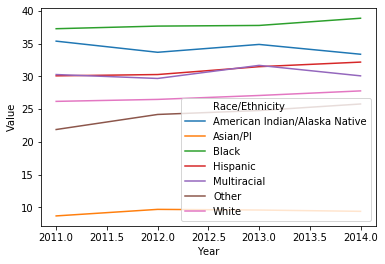

In [17]:
#Adult Obesity Through the Years (All Races, Both Sexes, by Race) Using U.S. Total
cond = (adult_obesity['Place'] == 'U.S. Total, U.S. Total') & (adult_obesity['Sex'] == 'Both') & (adult_obesity['Race/Ethnicity'] != 'All') 
adult_obesity_US_total = adult_obesity.loc[cond]
adult_obesity_US_total
sns.lineplot(x = 'Year', y = 'Value', data = adult_obesity_US_total, hue = 'Race/Ethnicity')

Across races the trends remain consitent, suggesting while overall obesity may be increasing, as proportions of ethnicities they remain at similar levels. One curious observation is that Obesity levels amongst the Caucasian race are fairly low compared to the rest of the ethnicities. One reason could be higher income levels for Caucasians overall. 

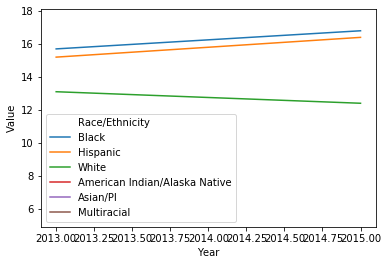

In [18]:
#Child Obesity Through the Years (All Races, Both Sexes, by Race) Using U.S. Total
cond = (child_obesity['Place'] == 'U.S. Total, U.S. Total') & (child_obesity['Sex'] == 'Both') & (child_obesity['Race/Ethnicity'] != 'All') 
child_obesity_US_total = child_obesity.loc[cond]
child_obesity_US_total
sns.lineplot(x = 'Year', y = 'Value', data = child_obesity_US_total, hue = 'Race/Ethnicity')

Data is too sparse to make any concrete determinations on this plot.

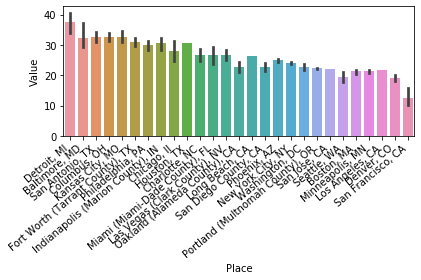

In [22]:
#Adult Obesity (All Year, All Races, Both Sexes (by City) Using U.S. Total)
cond = (adult_obesity['Place'] != 'U.S. Total, U.S. Total') & (adult_obesity['Sex'] == 'Both') &  (adult_obesity['Race/Ethnicity'] == 'All')
adult_obesity_US_total = adult_obesity.loc[cond].sort_values(by='Value', ascending=False)
ax = sns.barplot(x = 'Place', y = 'Value', data = adult_obesity_US_total)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

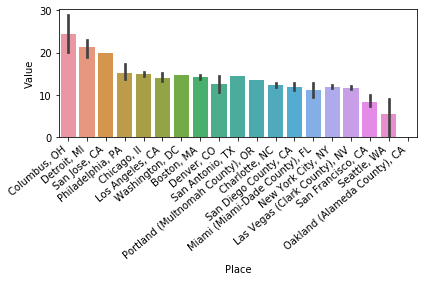

In [24]:
#Child Obesity (All Year, All Races, Both Sexes (by City) Using U.S. Total)
cond = (child_obesity['Place'] != 'U.S. Total, U.S. Total') & (child_obesity['Sex'] == 'Both') &  (child_obesity['Race/Ethnicity'] == 'All')
child_obesity_US_total = child_obesity.loc[cond].sort_values(by='Value', ascending=False)
ax = sns.barplot(x = 'Place', y = 'Value', data = child_obesity_US_total)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

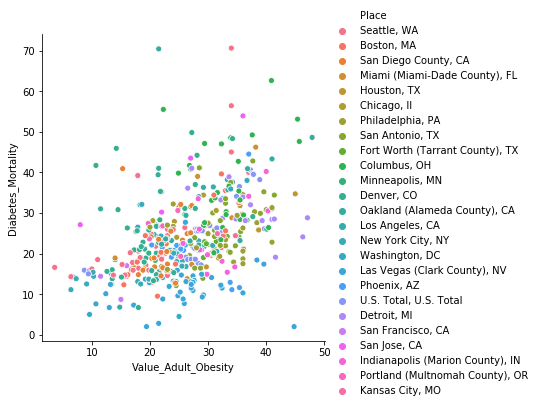

In [37]:
# looking at trends between Diabetes Related mortality and Obesity amongst adults by area.

cond = df.Indicator == 'Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)'
cond2 = df.Indicator == 'Percent of Adults Who Are Obese'

diabetes_mortality = df.loc[cond][['Year','Sex','Race/Ethnicity','Place','Value']]
adult_obese = df.loc[cond2][['Year','Sex','Race/Ethnicity','Place','Value']]

diabetes_obese = pd.merge(adult_obese, diabetes_mortality, on = ['Year', 'Sex','Race/Ethnicity', 'Place'] )
diabetes_obese.rename(columns = {'Value_x': 'Value_Adult_Obesity', 'Value_y':'Diabetes_Mortality'}, inplace = True)

sns.relplot(x = 'Value_Adult_Obesity', y = 'Diabetes_Mortality', hue = 'Place', data = diabetes_obese)

There appears to be a positive correlation between Obesity and Mortality caused by diabetes. This appears to hold across all the areas for which we have data. The unerlying cause may be that obese persons are at higher risk of diabetes compared to the rest of the population.

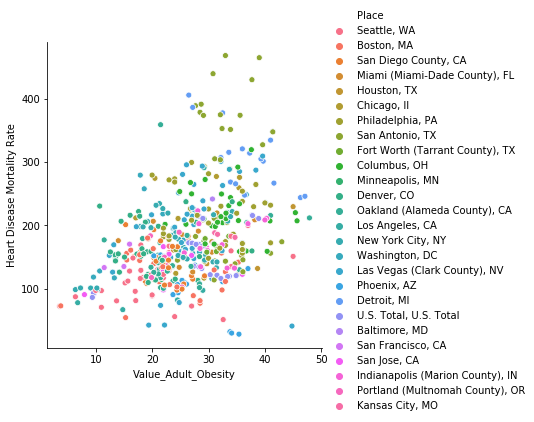

In [44]:
# looking at trends between Heart Disease Mortality Rate and Obesity amongst adults by area.

cond = df.Indicator == 'Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)'
cond2 = df.Indicator == 'Percent of Adults Who Are Obese'

heart_mortality = df.loc[cond][['Year','Sex','Race/Ethnicity','Place','Value']]
adult_obese = df.loc[cond2][['Year','Sex','Race/Ethnicity','Place','Value']]

heart_obese = pd.merge(adult_obese, heart_mortality, on = ['Year', 'Sex','Race/Ethnicity', 'Place'] )
heart_obese.rename(columns = {'Value_x': 'Value_Adult_Obesity', 'Value_y':'Heart Disease Mortality Rate'}, inplace = True)

sns.relplot(x = 'Value_Adult_Obesity', y = 'Heart Disease Mortality Rate', hue = 'Place', data = heart_obese)


Similar as the previous case, Obesity has a positive correlation with Heart Disease related mortality.

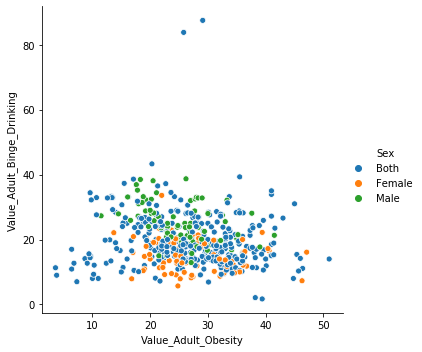

In [40]:
# Now a scatterplot between high alcohol consumption and obesity across the Sexes for Adults.
cond = df.Indicator == 'Percent of Adults Who Binge Drank' 
cond2 = df.Indicator == 'Percent of Adults Who Are Obese'

adult_obese = df.loc[cond2][['Year','Sex','Race/Ethnicity','Place','Value']]
adult_drink = df.loc[cond][['Year','Sex','Race/Ethnicity','Place','Value']]

obese_drink = pd.merge(adult_obese, adult_drink, on = ['Year', 'Sex','Race/Ethnicity', 'Place'] )
obese_drink.rename(columns = {'Value_x': 'Value_Adult_Obesity', 'Value_y':'Value_Adult_Binge_Drinking'}, inplace = True)

sns.relplot(x = 'Value_Adult_Obesity', y = 'Value_Adult_Binge_Drinking', hue = 'Sex', data = obese_drink)

It seems there is no linear relationship, there may be a non-linear one.

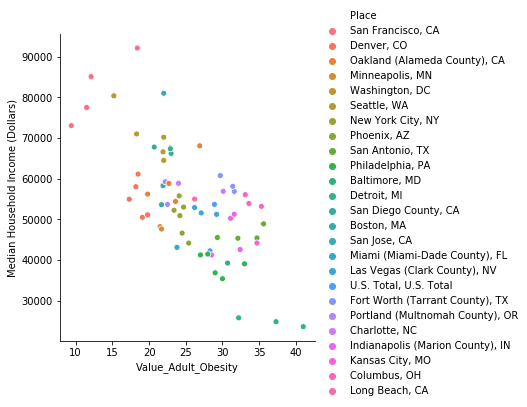

In [42]:
# Look at the scatterplot between Adult Obesity and Income Levels

cond = df.Indicator == 'Median Household Income (Dollars)'
cond2 = df.Indicator == 'Percent of Adults Who Are Obese'

adult_obese = df.loc[cond2][['Year','Sex','Race/Ethnicity','Place','Value']]
adult_income = df.loc[cond][['Year','Sex','Race/Ethnicity','Place','Value']]

obese_income = pd.merge(adult_obese, adult_income, on = ['Year', 'Sex','Race/Ethnicity', 'Place'] )
obese_income.rename(columns = {'Value_x': 'Value_Adult_Obesity', 'Value_y':'Median Household Income (Dollars)'}, inplace = True)

sns.relplot(x = 'Value_Adult_Obesity', y = 'Median Household Income (Dollars)', hue = 'Place', data = obese_income)

Clearly there is a negative correlation between income levels and Obesity, and that too across the cities, amongst adults. Underlying causes could be better access to higher quality food with more income and greater awareness and overall health concerns amngst individuals with higher incomes.

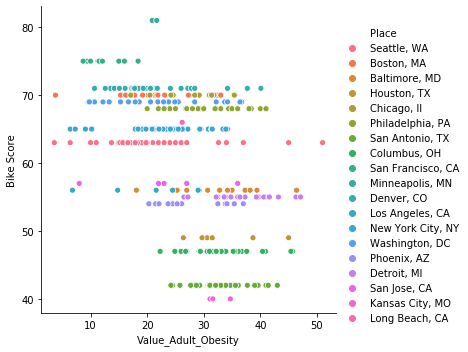

In [53]:
# How does bike score of an area reflect on obesity levels amongst adults.

cond = df.Indicator == 'Bike Score'
cond2 = df.Indicator == 'Percent of Adults Who Are Obese'

adult_obese = df.loc[cond2][['Place','Value']]
adult_bike = df.loc[cond][['Place','Value']]

obese_bike = pd.merge(adult_obese, adult_bike, on = ['Place'] )
obese_bike.rename(columns = {'Value_x': 'Value_Adult_Obesity', 'Value_y':'Bike Score'}, inplace = True)

sns.relplot(x = 'Value_Adult_Obesity', y = 'Bike Score', hue = 'Place', data = obese_bike)


This seems to suggest that higher bike score of a city lower the obesity level, however does require further evidence.

Now after exploring the data the following Hypothesis will be tested:

* There is a positive, possibly linear, relationship between Obesity levels and Diabetes Related Mortality Rates.
* There is a positive, possibly linear, relationship between Obesity levels and Heart Related Mortality Rates.
* There is a negative, possibly linear, relationship between Obesity levels and Income levels.
* There may be a positive non-linear relationship between Obesity and Alcohol consumption.
* There is a a negative relationship between the bike score of an area and its Obesity level.

To test these hypothesis, we attempt to find the correlations between all the major indicators.

In [54]:
import numpy as np

pivot = df.pivot_table(columns='Indicator', index='Place', values='Value')
corr_matrix = pivot.corr() # Create correlation matrix
np.fill_diagonal(corr_matrix.values, float("nan")) # remove 1s from diagonal
# select columns of interest
obese_corr = pd.DataFrame({'adults': corr_matrix['Percent of Adults Who Are Obese'],
                          'students':corr_matrix['Percent of High School Students Who Are Obese']}
                         )
obese_corr.idxmax() # find largest correlations

adults                         Percent of Population Under 18
students    Percent of Children Who Received Seasonal Flu ...
dtype: object

In [55]:
threshold = .6
high_corr = obese_corr.loc[(abs(obese_corr['adults']) > threshold) | (abs(obese_corr['students']) > threshold)]
high_corr

,adults,students
Indicator,,
"All Types of Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)",0.340502,0.629583
Bike Score,-0.686908,-0.508821
"Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)",0.158413,0.692413
"Firearm-Related Emergency Department Visit Rate (Age-Adjusted; Per 10,000 people)",0.606403,0.195406
"Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)",0.657844,0.441477
"Infant Mortality Rate (Per 1,000 live births)",0.712634,0.549033
Life Expectancy at Birth (Years),-0.729590,-0.722209
Median Household Income (Dollars),-0.738481,-0.159033
Percent of 3 and 4 Year Olds Currently Enrolled in Preschool,-0.666097,-0.418024


We can see that our hypothesis seem to be on right track as far as relationships are concerned, even with High School kids. But some surprising results (e.g. *Percent of Children Who Received Seasonal Flu Shot* or *Percent of 3 and 4 Year Olds Currently Enrolled in Preschool*). There may be indirect causes or reasons for this, however, it is impossible to determine with our current data.

We now attempt to find out which of these variables would be good predictors for obesity, and whether the relationships are of linear or non-linear nature.

In [56]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

**Adults:**

In [57]:
for indicator in high_corr.loc[abs(high_corr['adults']) > threshold].index:
    print('\n',indicator,':',sep='')
    data = pd.DataFrame({'X':pivot[indicator], 
                         'y':pivot['Percent of Adults Who Are Obese']}
                       ).loc[(pivot[indicator].isnull()==False) & 
                             (pivot['Percent of Adults Who Are Obese'].isnull()==False)] # drop NaN rows
    # Run linear regression
    linear = cross_validate(LinearRegression(), data[['X']], data['y'], cv=10)
    print('  Linear Model:', np.nanmean(linear['test_score']))
    # Run decision trees
    trees = cross_validate(DecisionTreeRegressor(max_depth=4), data[['X']], data['y'], cv=10)
    print('  Decision Tree Model:', np.nanmean(trees['test_score']))


Bike Score:
  Linear Model: -10.156814290645194
  Decision Tree Model: -11.343056996176777

Firearm-Related Emergency Department Visit Rate (Age-Adjusted; Per 10,000 people):
  Linear Model: -0.9506034910619545
  Decision Tree Model: -1.8387918310196625

Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people):
  Linear Model: -3.624009396520612
  Decision Tree Model: -6.621702341505812

Infant Mortality Rate (Per 1,000 live births):
  Linear Model: -1.8605530399273953
  Decision Tree Model: -2.12578158589224

Life Expectancy at Birth (Years):
  Linear Model: -4.731764089144564
  Decision Tree Model: -12.933978066825787

Median Household Income (Dollars):
  Linear Model: -11.03876898874518
  Decision Tree Model: -13.783973278995294

Percent of 3 and 4 Year Olds Currently Enrolled in Preschool:
  Linear Model: -2.595761760787413
  Decision Tree Model: -10.939718151980868

Percent of Adults Who Currently Smoke:
  Linear Model: -0.29383137885076915
  Decision Tree Model: -0.776103

**High School Students:**

In [10]:
for indicator in high_corr.loc[abs(high_corr['students']) > threshold].index:
    print('\n',indicator,':',sep='')
    data = pd.DataFrame({'X':pivot[indicator], 
                         'y':pivot['Percent of High School Students Who Are Obese']}
                       ).loc[(pivot[indicator].isnull()==False) & 
                             (pivot['Percent of High School Students Who Are Obese'].isnull()==False)] # drop NaN rows
    # Run linear regression
    linear = cross_validate(LinearRegression(), data[['X']], data['y'], cv=5)
    print('  Linear Model:', np.nanmean(linear['test_score']))
    # Run with decision trees
    trees = cross_validate(DecisionTreeRegressor(max_depth=4), data[['X']], data['y'], cv=5)
    print('  Decision Tree Model:', np.nanmean(trees['test_score']))


All Types of Cancer Mortality Rate (Age-Adjusted; Per 100,000 people):
  Linear Model: -0.6422372476770194
  Decision Tree Model: -7.280770399867597

Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people):
  Linear Model: -1.6167040070592713
  Decision Tree Model: -4.387814427387748

Life Expectancy at Birth (Years):
  Linear Model: -1.418060790565736
  Decision Tree Model: -11.403062481430357

Percent of Adults Who Currently Smoke:
  Linear Model: -0.3446264721729695
  Decision Tree Model: -1.7021816725942291

Percent of Children Who Received Seasonal Flu Shot:
  Linear Model: -6.8908050630473365
  Decision Tree Model: -15.652430551168916

Transit Score:
  Linear Model: -6.354142227572901
  Decision Tree Model: -6.2942952476211005


While, the results of test score of the models seem to support our hypothesis, the magnitude of the numbers suggest that there was not enough data to say something with high confidence.

### III. Limitations of the Data

In this part, I would like to you think about realistic limitations about this dataset. Which attributes/factors are not included in the dataset, but can be important in understanding or effecting a health factor?

This part requires you to think deeply and speculate larger hypotheses.

It also requires your team to collect additional data not included in this dataset.

Lastly, it requires you to perform analyses to prove or disprove your hypotheses.  This part should require pandas, sklearn, etc.

### IV. Project Report

The report should be in stages. You should turn in notebooks with properly named. For example, COMP4151_Project_Team01_StageI.ipynb.